In [1]:
import pandas as pd 
import numpy as np 
import extract_vector as ev
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit,LeaveOneOut,KFold
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def clean_train_data(train_data, train_label):
    """
    Input: train_data,train_label 
    Ouput: train_data,train_label 
           updated train data and updated train label after removing the nan rows
    """
    n = train_data.shape[0]
    m = train_data.shape[1]
    nan_ll = []
    for i in range(n):
        if(np.isnan(np.sum(train_data[i:i+1, :]))):
            nan_ll.append(i)

    train_data = np.delete(train_data, nan_ll, 0)
    train_label = np.delete(train_label, nan_ll, 0)
    return train_data, train_label

In [3]:
def get_train_labels(train_label):
    for i in train_label:
        if(i[0] > 4.5):
            i[0] = 1
        else:
            i[0] = 0

        if(i[1] > 4.5):
            i[1] = 1
        else:
            i[1] = 0
    return train_label

In [4]:
def get_emotion_label(labels):
    emo = []
    for i in labels:
        if(i[0] == 0 and i[1] == 0):
            emo.append(0)
        elif(i[0] == 1 and i[1] == 0):
            emo.append(1)
        elif(i[0] == 0 and i[1] == 1):
            emo.append(2)
        elif(i[0] == 1 and i[1] == 1):
            emo.append(3)
    return emo

## Wavelet Entropy Model

In [5]:
train_data = ev.getWaveletEntropyData()
train_label = ev.getLabelData(type='ValAr')

In [6]:
train_data,train_label = clean_train_data(train_data,train_label)
train_label = get_train_labels(train_label)
arousal_label = train_label[:,0]
valence_label = train_label[:,1]

In [7]:
sm1 = SMOTE()
sm2 = SMOTE()
train_a_data,arousal_label = sm1.fit_resample(train_data,arousal_label)
train_v_data,valence_label = sm2.fit_resample(train_data,valence_label)

In [8]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(train_a_data,arousal_label,test_size = 0.3,random_state = 42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(train_v_data,valence_label,test_size = 0.3,random_state = 42)

### Arousal

In [9]:
arousal_model = SVC(kernel='rbf',C = 100)

In [10]:
arousal_model.fit(x_a_train,y_a_train)

SVC(C=100)

In [11]:
pred0 = arousal_model.predict(x_a_test)

In [12]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81       190
         1.0       0.66      0.90      0.76       115

    accuracy                           0.79       305
   macro avg       0.79      0.81      0.79       305
weighted avg       0.83      0.79      0.79       305



In [13]:
print(accuracy_score(pred0,y_a_test))

0.7901639344262295


In [14]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81       190
         1.0       0.66      0.90      0.76       115

    accuracy                           0.79       305
   macro avg       0.79      0.81      0.79       305
weighted avg       0.83      0.79      0.79       305



In [15]:
confusion_matrix(pred0,y_a_test)

array([[137,  53],
       [ 11, 104]], dtype=int64)

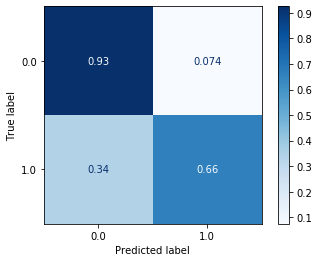

In [16]:
plot_confusion_matrix(arousal_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [17]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvkfold).mean()*100

74.75409836065575

### Leave One Out Cross Validation:-

In [18]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_a_data)
no_splits

1014

In [19]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvloocv).mean()*100

75.39560901477674

### Valence

In [20]:
valence_model = SVC(kernel='rbf',C = 100)

In [21]:
valence_model.fit(x_v_train,y_v_train)

SVC(C=100)

In [22]:
pred1 = valence_model.predict(x_v_test)

In [23]:
print(classification_report(pred1,y_v_test))

              precision    recall  f1-score   support

         0.0       0.77      0.61      0.68       173
         1.0       0.51      0.69      0.58       102

    accuracy                           0.64       275
   macro avg       0.64      0.65      0.63       275
weighted avg       0.67      0.64      0.64       275



In [24]:
print(accuracy_score(pred1,y_v_test))

0.6363636363636364


In [25]:
confusion_matrix(pred1,y_v_test)

array([[105,  68],
       [ 32,  70]], dtype=int64)

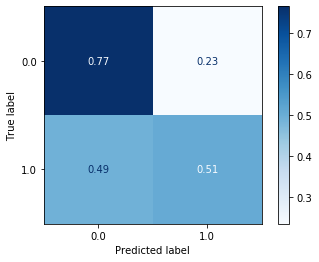

In [26]:
plot_confusion_matrix(valence_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [27]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvkfold).mean()*100

65.74545454545454

### Leave One Out Cross Validation:-

In [28]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_v_data)
no_splits

914

In [29]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvloocv).mean()*100

65.64432066839069

### Emotion

In [30]:
# true_emotion = get_emotion_label(y_test)

In [31]:
# pred_emotion = np.array(list(zip(pred0,pred1)))
# pred_emotion = get_emotion_label(pred_emotion)

In [32]:
# confusion_matrix(true_emotion,pred_emotion)

In [33]:
# accuracy_score(true_emotion,pred_emotion)

## Fourier Entropy Model

In [34]:
train_data = ev.getFourierEntropyData()
train_label = ev.getLabelData(type='ValAr')

In [35]:
train_data,train_label = clean_train_data(train_data,train_label)
train_label = get_train_labels(train_label)
arousal_label = train_label[:,0]
valence_label = train_label[:,1]

In [36]:
sm1 = SMOTE()
sm2 = SMOTE()
train_a_data,arousal_label = sm1.fit_resample(train_data,arousal_label)
train_v_data,valence_label = sm2.fit_resample(train_data,valence_label)

In [37]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(train_a_data,arousal_label,test_size = 0.3,random_state = 42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(train_v_data,valence_label,test_size = 0.3,random_state = 42)

### Arousal

In [38]:
arousal_model = SVC(kernel='rbf',C = 100)

In [39]:
arousal_model.fit(x_a_train,y_a_train)

SVC(C=100)

In [40]:
pred0 = arousal_model.predict(x_a_test)

In [41]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       168
         1.0       0.67      0.77      0.71       137

    accuracy                           0.72       305
   macro avg       0.73      0.73      0.72       305
weighted avg       0.73      0.72      0.73       305



In [42]:
print(accuracy_score(pred0,y_a_test))

0.7245901639344262


In [43]:
confusion_matrix(pred0,y_a_test)

array([[116,  52],
       [ 32, 105]], dtype=int64)

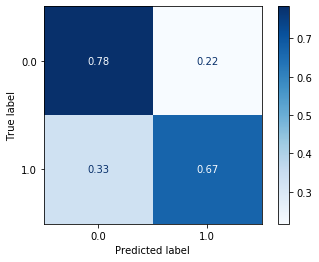

In [44]:
plot_confusion_matrix(arousal_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [45]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvkfold).mean()*100

73.70491803278689

### Leave One Out Cross Validation:-

In [46]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_a_data)
no_splits

1014

In [47]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvloocv).mean()*100

75.64037895689849

### Valence

In [48]:
valence_model = SVC(kernel='rbf',C = 100)

In [49]:
valence_model.fit(x_v_train,y_v_train)

SVC(C=100)

In [50]:
pred1 = valence_model.predict(x_v_test)

In [51]:
print(classification_report(pred1,y_v_test))

              precision    recall  f1-score   support

         0.0       0.73      0.63      0.68       158
         1.0       0.58      0.68      0.63       117

    accuracy                           0.65       275
   macro avg       0.65      0.66      0.65       275
weighted avg       0.67      0.65      0.66       275



In [52]:
print(accuracy_score(pred1,y_v_test))

0.6545454545454545


In [53]:
confusion_matrix(pred1,y_v_test)

array([[100,  58],
       [ 37,  80]], dtype=int64)

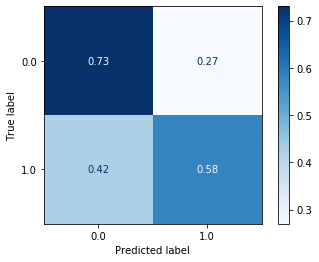

In [54]:
plot_confusion_matrix(valence_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [55]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvkfold).mean()*100

61.81818181818181

### Leave One Out Cross Validation:-

In [56]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_v_data)
no_splits

914

In [57]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvloocv).mean()*100

61.54843843246468

### Emotion

In [58]:
# true_emotion = get_emotion_label(y_test)

In [59]:
# pred_emotion = np.array(list(zip(pred0,pred1)))
# pred_emotion = get_emotion_label(pred_emotion)

In [60]:
# cm = confusion_matrix(true_emotion,pred_emotion)
# cm

In [61]:
# accuracy_score(true_emotion,pred_emotion)